In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("./Cleaned_dataset.csv")

df = df.dropna()
df.drop_duplicates(keep='last', ignore_index=True, inplace=True)
df['Date_of_journey'] = pd.to_datetime(df['Date_of_journey'])
df = df.reset_index(drop = True)
df.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [4]:
df.shape

(445366, 13)

In [5]:
df.describe()

,Date_of_journey,Duration_in_hours,Days_left,Fare
count,445366,445366.000000,445366.000000,445366.000000
mean,2023-02-09 14:49:39.837706752,12.182491,25.617822,22919.747165
min,2023-01-16 00:00:00,0.750000,1.000000,1307.000000
25%,2023-01-28 00:00:00,6.500000,13.000000,8712.000000
50%,2023-02-10 00:00:00,11.250000,26.000000,13362.000000
75%,2023-02-22 00:00:00,16.333300,38.000000,36980.000000
max,2023-03-06 00:00:00,43.583300,50.000000,143019.000000
std,NaN,7.299361,14.302610,20394.214040


In [6]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

df['Journey_day'] = pd.Categorical(df['Journey_day'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
ohencode = OneHotEncoder(handle_unknown='ignore', sparse_output=False).set_output(transform='pandas')
encode = LabelEncoder()

In [7]:
# One Hot encoding the rest of the categorical data
for col in ["Journey_day","Airline","Class", "Source", "Departure", "Total_stops", "Arrival", "Destination"]:
    ohetransform = ohencode.fit_transform(df[[col]])
    df = pd.concat([df, ohetransform], axis=1).drop(columns=[col])

# Label Encoding Flight_code
df.Flight_code = encode.fit_transform(df.Flight_code)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445366 entries, 0 to 445365
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Date_of_journey         445366 non-null  datetime64[ns]
 1   Flight_code             445366 non-null  int64         
 2   Duration_in_hours       445366 non-null  float64       
 3   Days_left               445366 non-null  int64         
 4   Fare                    445366 non-null  int64         
 5   Journey_day_Friday      445366 non-null  float64       
 6   Journey_day_Monday      445366 non-null  float64       
 7   Journey_day_Saturday    445366 non-null  float64       
 8   Journey_day_Sunday      445366 non-null  float64       
 9   Journey_day_Thursday    445366 non-null  float64       
 10  Journey_day_Tuesday     445366 non-null  float64       
 11  Journey_day_Wednesday   445366 non-null  float64       
 12  Airline_Air India       445366

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

models_dict = {}

df.sort_values(by='Date_of_journey')

X=df.drop(['Fare'],axis=1)
y=df['Fare']

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X['Duration_in_hours'] = scaler.fit_transform(X[['Duration_in_hours']])
X['Days_left'] = scaler.fit_transform(X[['Days_left']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

X_train

,Date_of_journey,Flight_code,Duration_in_hours,Days_left,Journey_day_Friday,Journey_day_Monday,Journey_day_Saturday,Journey_day_Sunday,Journey_day_Thursday,Journey_day_Tuesday,...,Arrival_6 AM - 12 PM,Arrival_After 6 PM,Arrival_Before 6 AM,Destination_Ahmedabad,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
350132,2023-02-02,1300,-0.675744,-0.532618,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
253225,2023-02-17,1304,-0.047839,0.516143,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300824,2023-03-05,4,-1.052489,1.634821,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
203178,2023-02-14,355,-0.572995,0.306390,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
13353,2023-02-19,1259,-0.835580,0.655977,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,2023-01-21,752,-1.486322,-1.371627,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
365838,2023-02-12,1305,-0.025001,0.166556,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
131932,2023-01-31,856,0.032086,-0.672453,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
146867,2023-02-14,1403,1.322146,0.306390,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


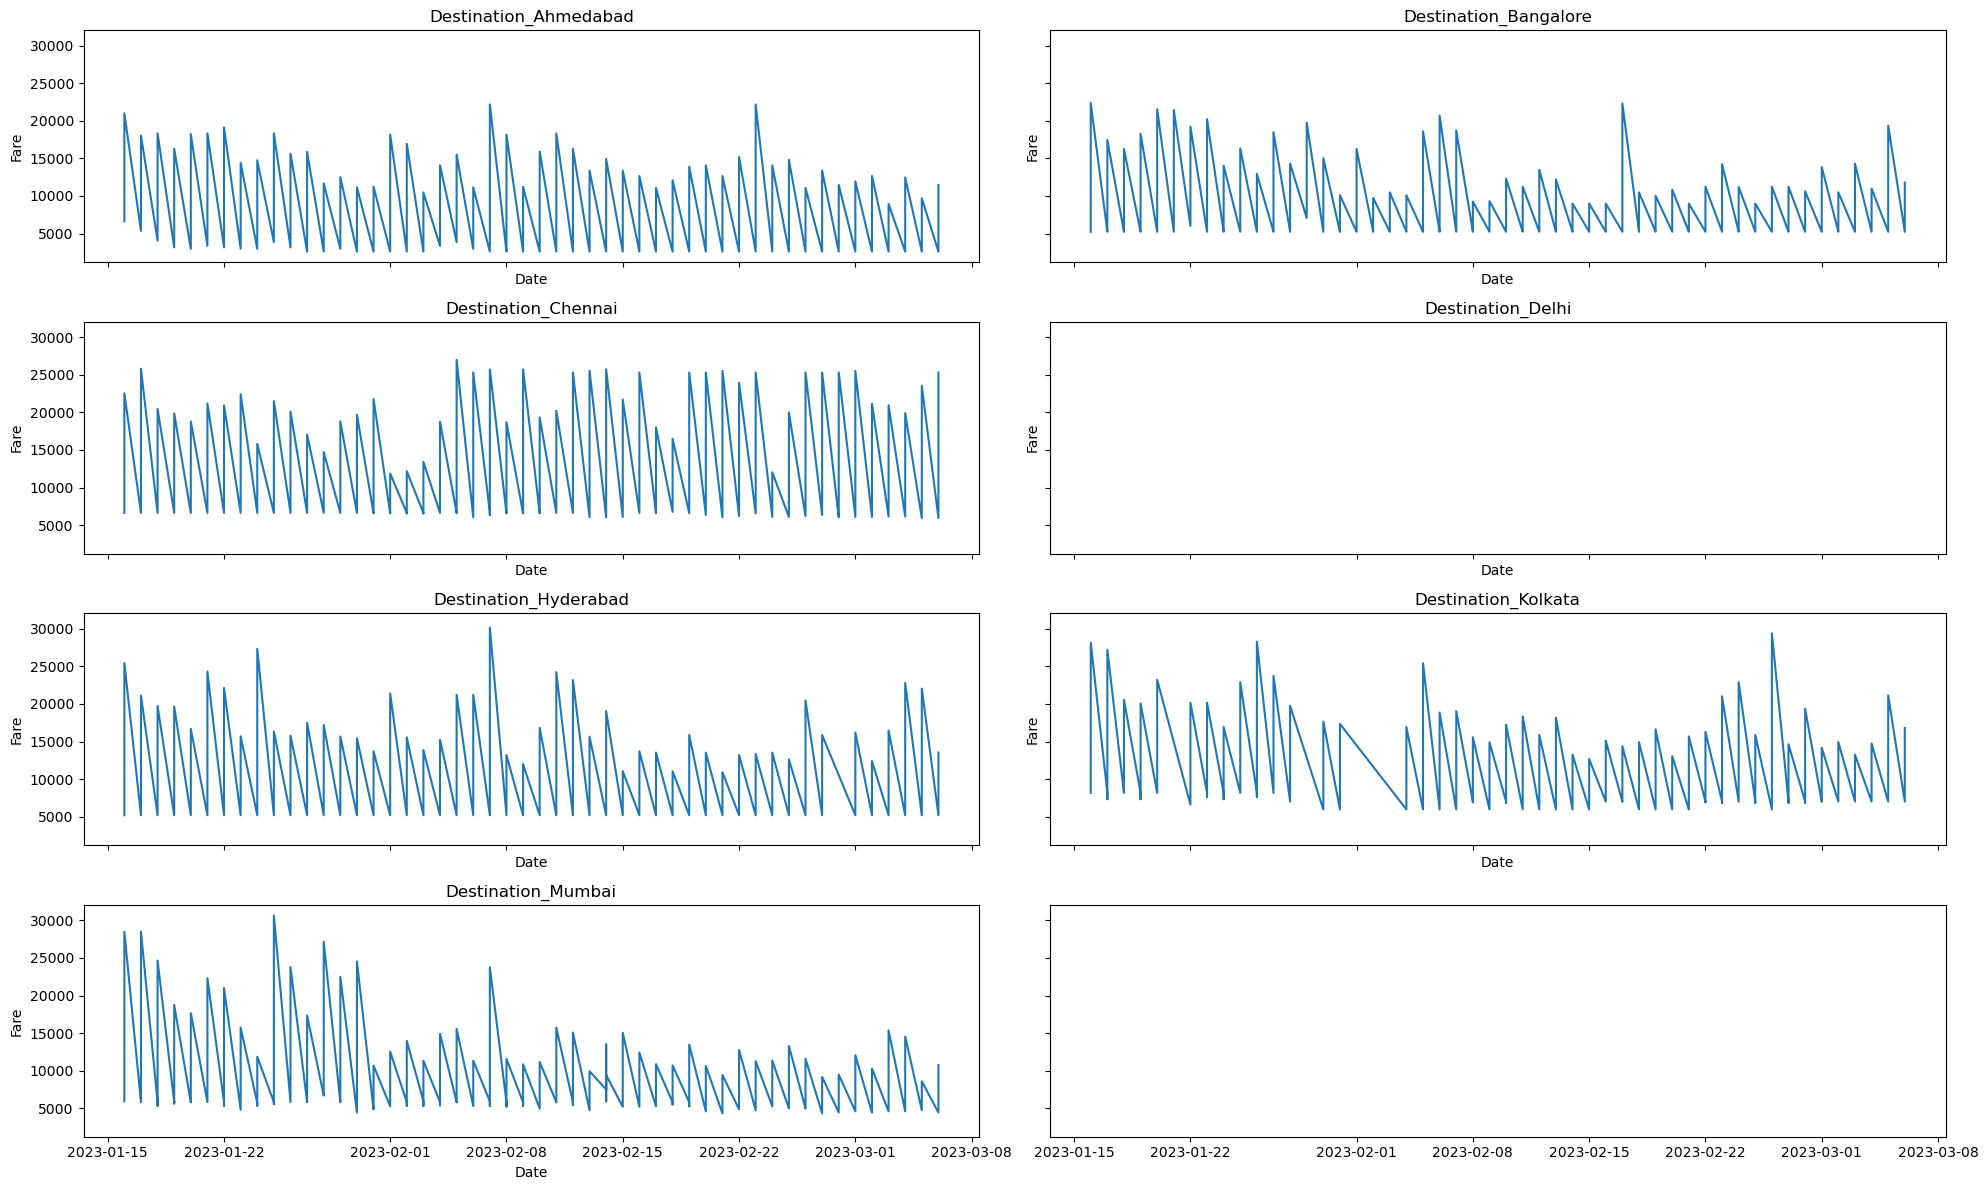

In [10]:
fig, axs = plt.subplots(4, 2, figsize=(20,12), sharex=True, sharey=True)

# List of destination labels
destinations = ['Destination_Ahmedabad','Destination_Bangalore','Destination_Chennai','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_Mumbai']
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting each destination fare in a subplot
for i, destination in enumerate(destinations):

    subset = df[df["Airline_Indigo"] == 1]
    subset = subset[subset["Class_Economy"] == 1]
    subset = subset[subset["Source_Delhi"] == 1]
    subset = subset[subset[destination] == 1]
    
    axs[i].set_title(destination)
    axs[i].plot(subset["Date_of_journey"], subset["Fare"])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Fare')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

/home/prab/miniconda3/envs/islp2/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:472: RuntimeWarning: Mean of empty slice.
  xo = x - x.mean()
/home/prab/miniconda3/envs/islp2/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError for Destination_Delhi: negative dimensions are not allowed


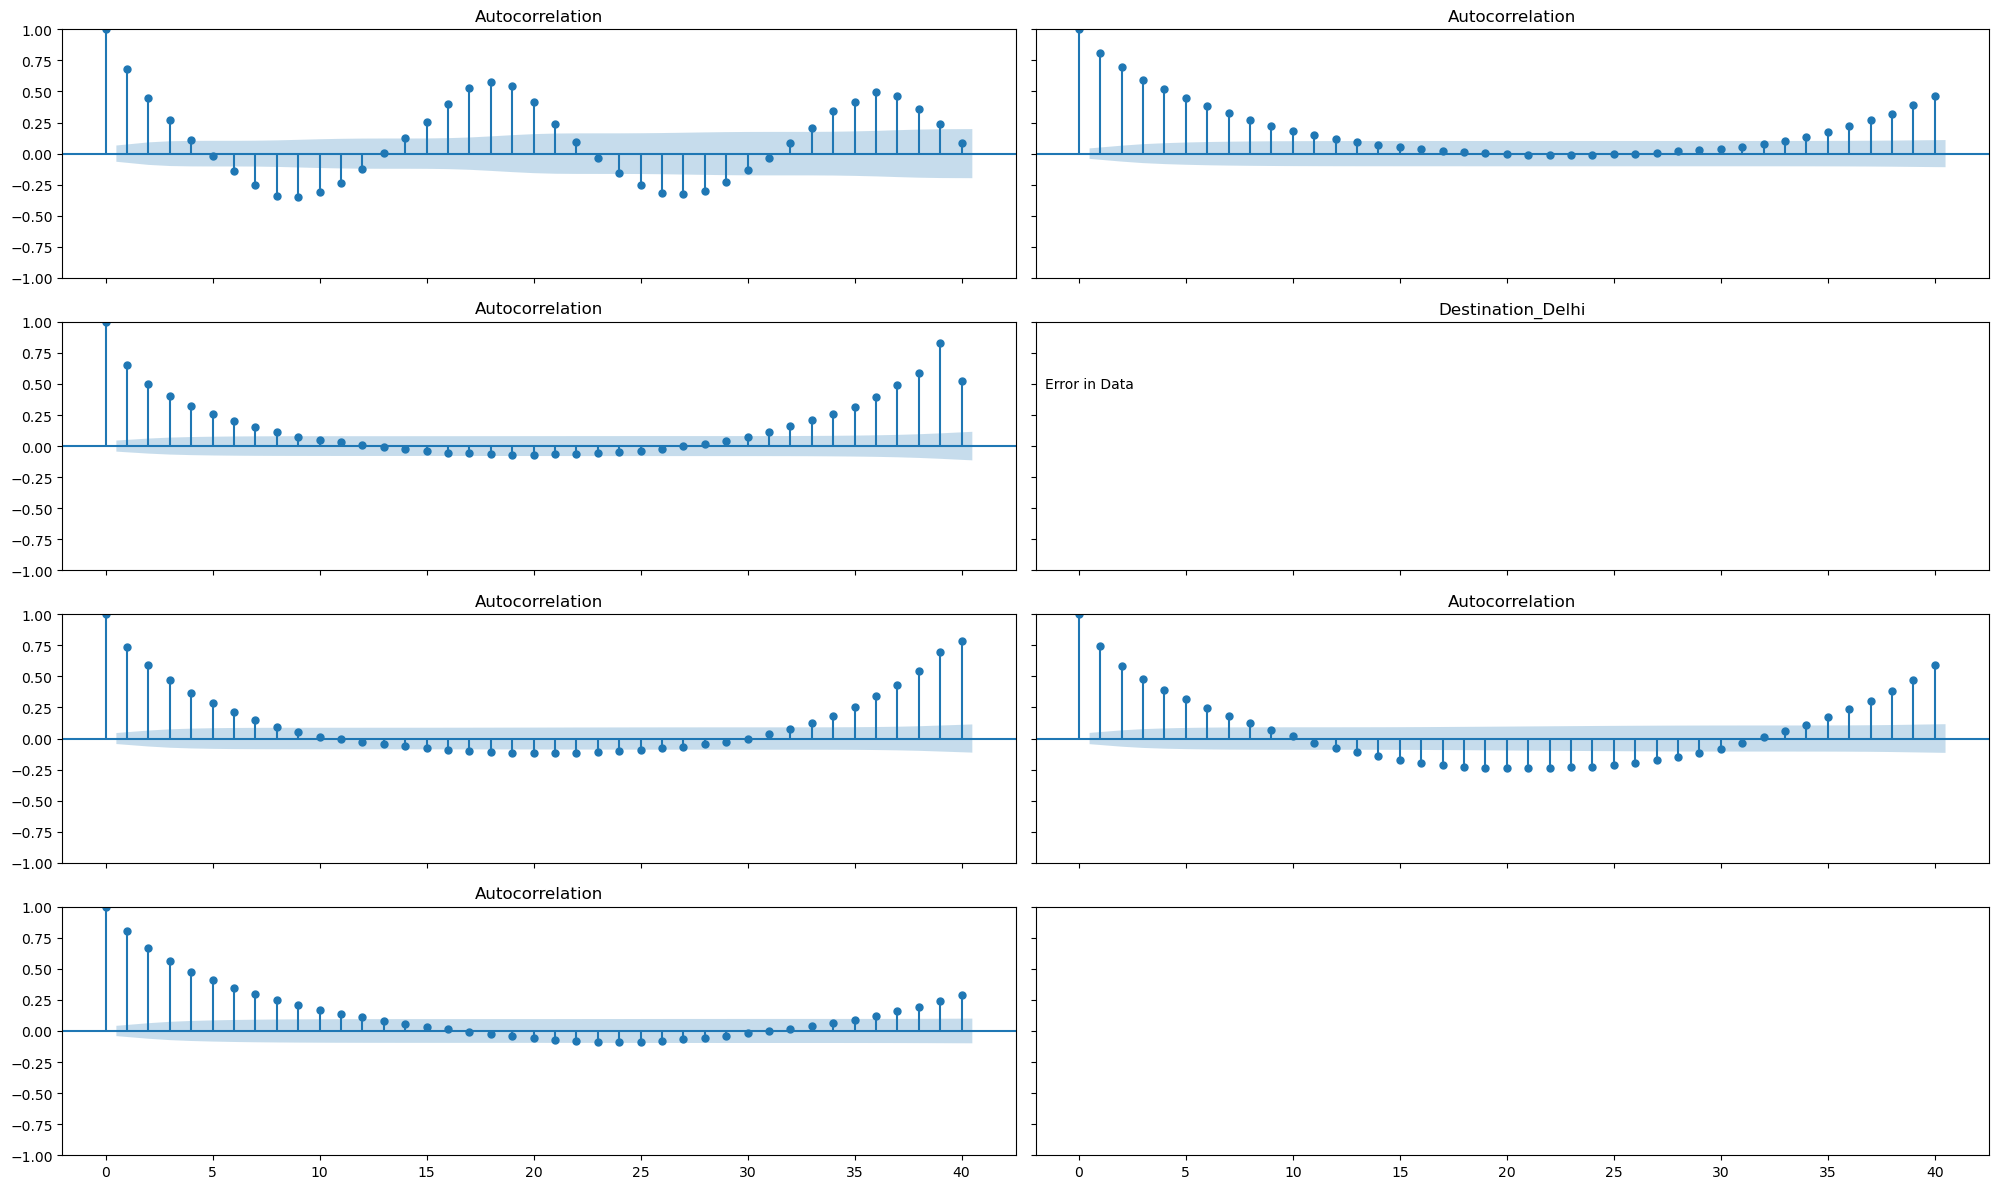

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axs = plt.subplots(4, 2, figsize=(20,12), sharex=True, sharey=True)

# List of destination labels
destinations = ['Destination_Ahmedabad','Destination_Bangalore','Destination_Chennai','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_Mumbai']
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting each destination fare in a subplot
for i, destination in enumerate(destinations):
    
    try:
        subset = df[df["Airline_Indigo"] == 1]
        subset = subset[subset["Class_Economy"] == 1]
        subset = subset[subset["Source_Delhi"] == 1]
        subset = subset[subset[destination] == 1]
        axs[i].set_title(destination)
        axs[i].xaxis.set_ticks(np.arange(0, 41, 5))

        plot_acf(subset["Fare"], ax=axs[i], lags=40)

    except ValueError as e:
        
        print(f"ValueError for {destination}: {e}")
        axs[i].text(0.5, 0.5, 'Error in Data', horizontalalignment='center', verticalalignment='center')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

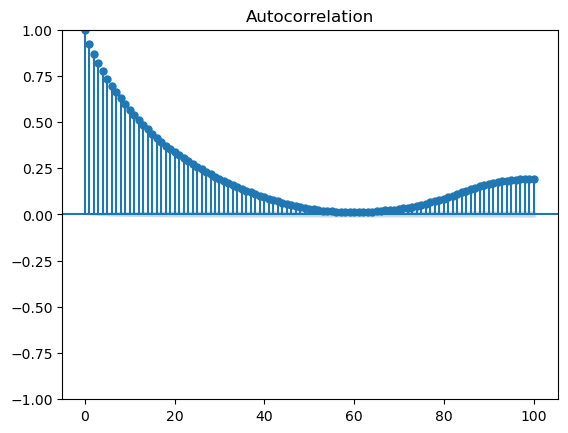

In [12]:
subset = df[df["Class_Economy"] == 1]
plot_acf(subset["Fare"], lags=100)
print()

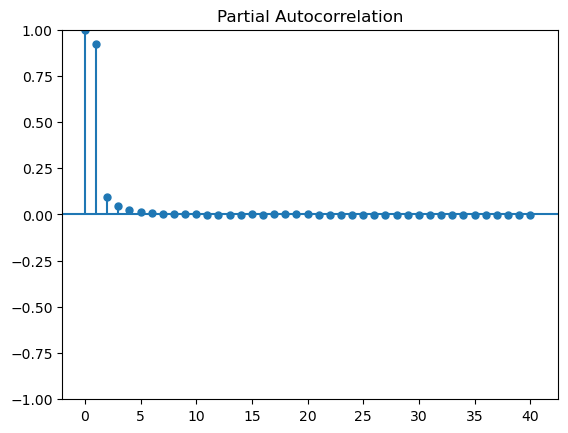

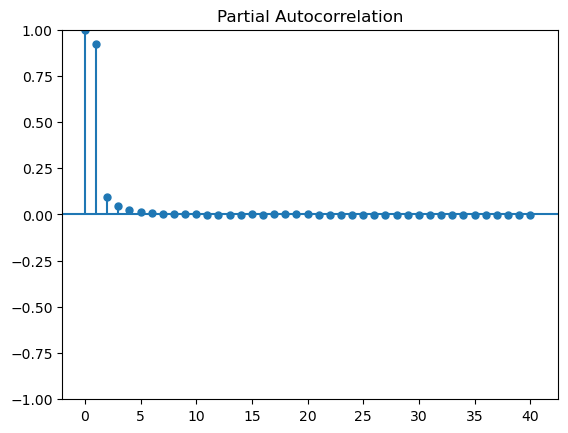

In [13]:
plot_pacf(subset["Fare"], lags=40)

ValueError for Destination_Delhi: Can only compute partial correlations for lags up to 50% of the sample size. The requested nlags 40 must be < 0.


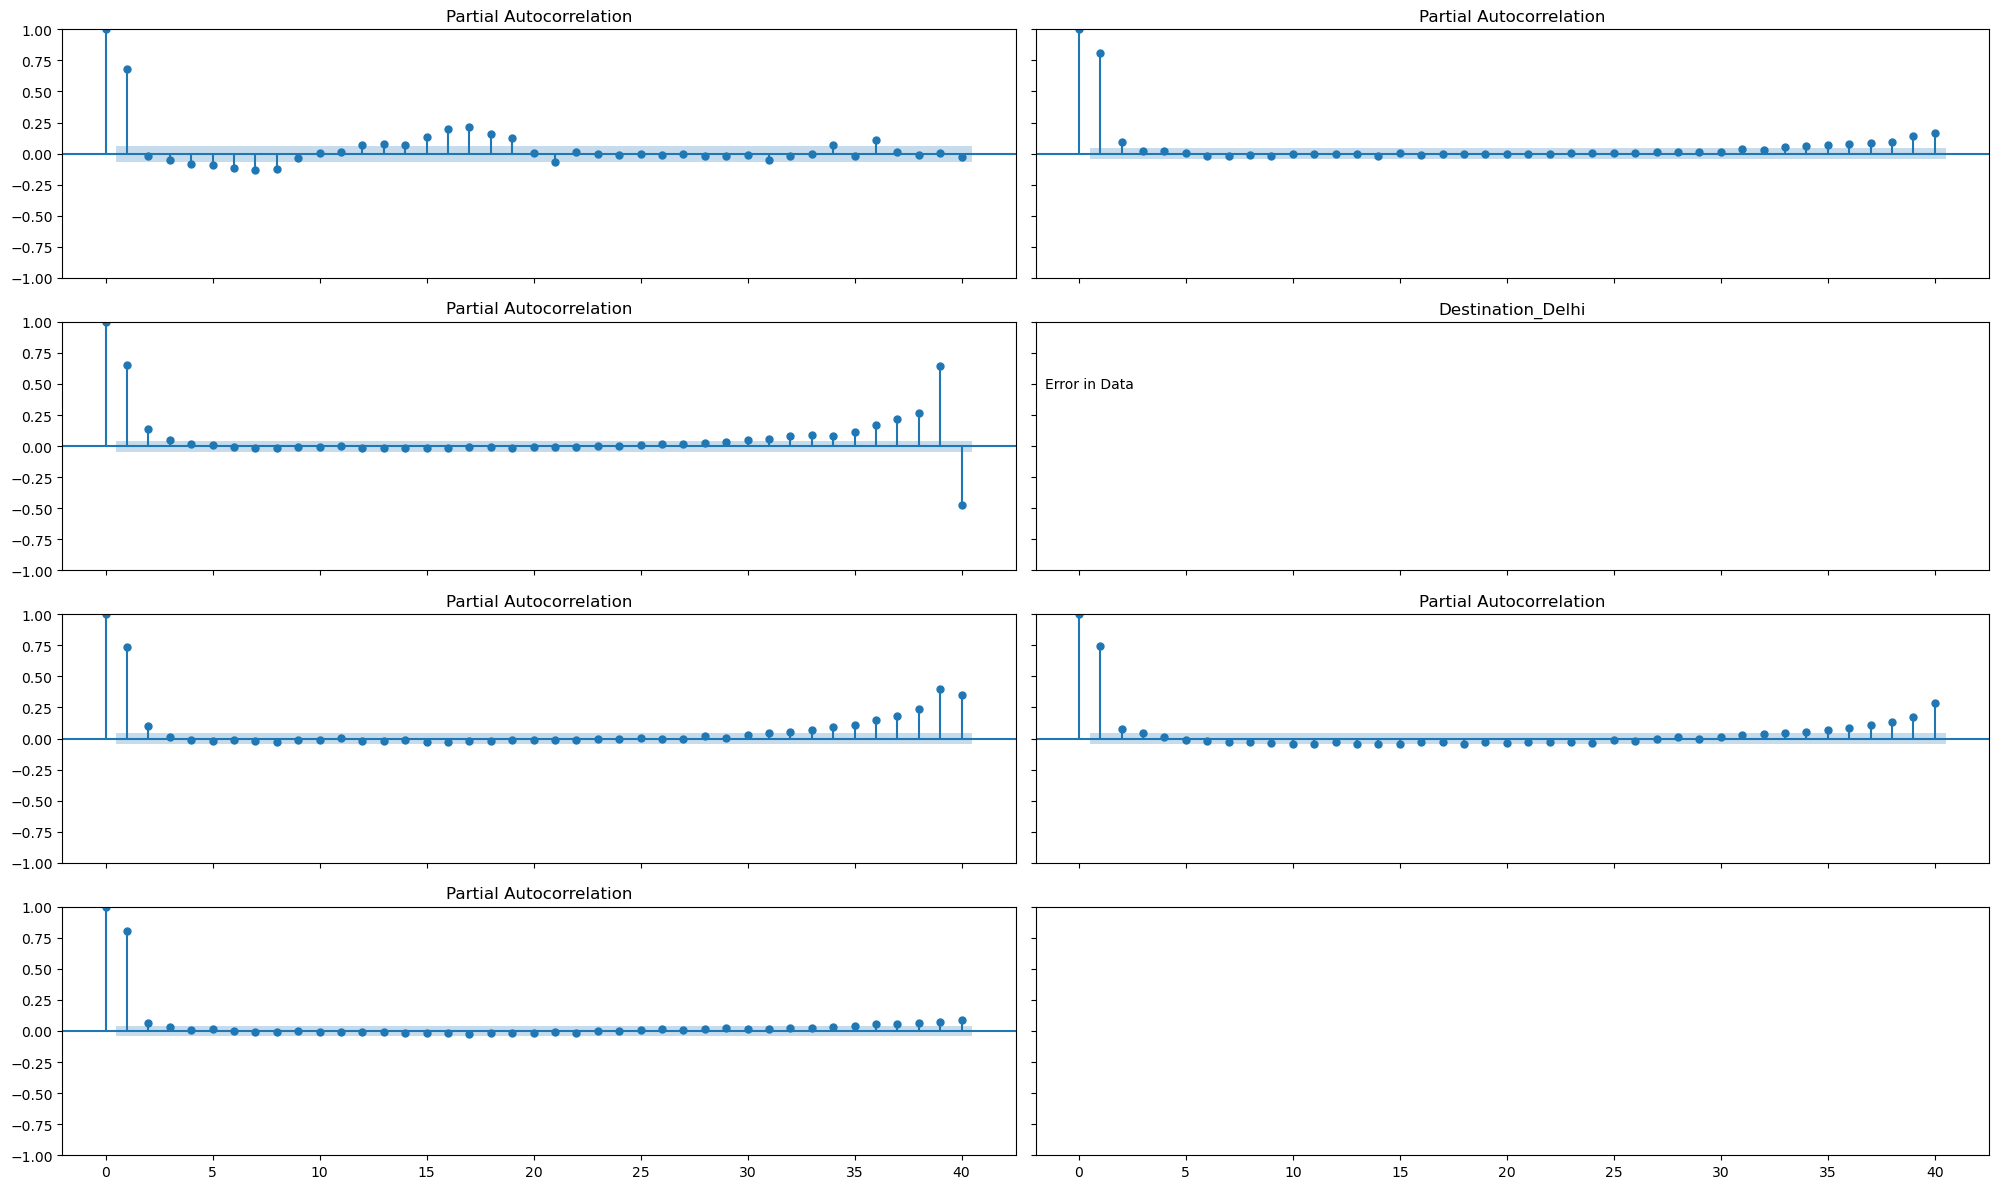

In [14]:
fig, axs = plt.subplots(4, 2, figsize=(20,12), sharex=True, sharey=True)

# List of destination labels
destinations = ['Destination_Ahmedabad','Destination_Bangalore','Destination_Chennai','Destination_Delhi','Destination_Hyderabad','Destination_Kolkata','Destination_Mumbai']
# Flatten the axs array for easy iteration
axs = axs.flatten()

# Plotting each destination fare in a subplot
for i, destination in enumerate(destinations):
    
    try:
        subset = df[df["Airline_Indigo"] == 1]
        subset = subset[subset["Class_Economy"] == 1]
        subset = subset[subset["Source_Delhi"] == 1]
        subset = subset[subset[destination] == 1]
        axs[i].set_title(destination)
        axs[i].xaxis.set_ticks(np.arange(0, 41, 5))

        plot_pacf(subset["Fare"], ax=axs[i], lags=40)

    except ValueError as e:
        
        print(f"ValueError for {destination}: {e}")
        axs[i].text(0.5, 0.5, 'Error in Data', horizontalalignment='center', verticalalignment='center')
# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm # type: ignore

dict = {}

        
subset = df[df["Airline_Indigo"] == 1]
# subset = subset[subset["Class_Economy"] == 1]
# subset = subset[subset["Source_Delhi"] == 1]
# subset = subset[subset["Destination_Mumbai"] == 1]

result = adfuller(subset["Fare"])
dict[destination] = (result[0], result[1])

'''except ValueError as e:
        print(f"ValueError for {destination}: {e}")
        dict[destination] = (None, None)'''

results_df = pd.DataFrame(dict).T
results_df.columns = ["ADF Statistic", "p-value"]

results_df

,ADF Statistic,p-value
Destination_Mumbai,-10.645401,4.810215e-19


In [16]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# subset = df[df["Airline_Indigo"] == 0]
subset = df[df["Class_Economy"] == 1]
# subset = subset[subset["Source_Delhi"] == 1]
# subset = subset[subset["Destination_Mumbai"] == 1]

# subset = df

In [ ]:
model = pm.auto_arima(subset["Fare"], seasonal=True, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=157.48 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4423273.463, Time=2.75 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4419176.063, Time=5.88 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4418504.380, Time=8.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4423271.463, Time=1.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=72.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4417285.986, Time=12.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=67.67 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4416784.706, Time=16.78 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=98.15 sec


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

y = subset["Fare"]
print (y.shape)

# Split the df into train and test
train_size = int(len(subset) * 0.8)

train = y[0:train_size]
test = y[train_size:len(subset)]

# Fit the ARIMA model on the training dataset
model = SARIMAX(subset["Fare"], order=(0, 1, 5))
model_fit = model.fit()
# print(model_fit.summary())
if model_fit:
    print("Model fitting successful.")

In [ ]:
start = train_size  # Example start point for in-sample predictions
end = len(subset) - 1  # Example end point for in-sample predictions
predictions = model_fit.predict(start=start, end=end, dynamic=False)

plt.figure(figsize=(12,5))
plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predictions')

In [ ]:
def RMSE (y_test, y_pred):
    return np.sqrt(np.mean((y_test - y_pred) ** 2))

def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {RMSE(test, predictions)}")
print(f"MAPE: {MAPE(test, predictions)}")

models_dict['SARIMAX'] = [model, RMSE(test, predictions), MAPE(test, predictions)]

In [ ]:
out=pd.DataFrame({'Price_actual':test,'Price_pred':predictions})
result=df.merge(out,left_index=True,right_index=True)

airline_df = result[result['Airline_Indigo']==1]
airline_df = airline_df[airline_df['Class_Economy']==1]

plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Fare')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = subset.drop(['Fare', "Date_of_journey"], axis=1)
y = subset['Fare']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)

print(f"RMSE: {RMSE(y_test, y_preds)}")
print(f"MAPE: {MAPE(y_test, y_preds)}")

models_dict["RandomForestRegressor"] = [model, RMSE(y_test, y_preds), MAPE(y_test, y_preds)]

In [ ]:
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_preds})
result=df.merge(out,left_index=True,right_index=True)

plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(subset["Fare"], seasonal='add', seasonal_periods=7, use_boxcox = 0.01)

model_fit = model.fit()

predictions = model_fit.predict(start=train_size, end=len(subset)-1)

plt.figure(figsize=(12,5))

plt.plot(train, label='Training')
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predictions')

In [ ]:
print(f"RMSE: {RMSE(test, predictions)}")
print(f"MAPE: {MAPE(test, predictions)}")

models_dict['HoltWinters'] = [model, RMSE(test, predictions), MAPE(test, predictions)]

In [ ]:
out=pd.DataFrame({'Price_actual':test,'Price_pred':predictions})
result=df.merge(out,left_index=True,right_index=True)

airline_df = result[result['Airline_Indigo']==8]
airline_df = airline_df[airline_df['Class_Economy']==1]

plt.figure(figsize=(20,8))
plt.figure(figsize=(20,8))
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=airline_df, x='Date_of_journey', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Date of Journey')
plt.ylabel('Fare')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,8))
sns.lineplot(data=result, x='Flight_code', y='Price_actual', label='Actual', color='blue')
sns.lineplot(data=result, x='Flight_code', y='Price_pred', label='Predicted', color='red')
plt.xlabel('Flight Code')
plt.ylabel('Target Value')
plt.title('Comparison of Actual and Predicted Values')
plt.legend()
plt.show()

In [ ]:
models_df = pd.DataFrame(models_dict).T
models_df.columns = ["Model", "RMSE", "MAPE"]
models_df